In [37]:
import pandas as pd
import plotly
import plotly.express as px
from plotly.offline import iplot
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import os 
from dagster import Definitions


In [38]:
import sys
sys.path.append('C:\\Users\\ipek\\Desktop\\staj-DATABOSS\\dagster-project\\my-tutorial-project\\tutorial')
from tutorial import assets



In [41]:
try:
    #iris = tutorial.load_asset_value("dataset")
    df = iris
except:
    path = 'C:\\Users\\ipek\\Desktop\\staj-DATABOSS\\dagster-project\\my-tutorial-project\\result.csv'
    df = pd.read_csv(path)
df.head()

C:\Users\ipek\AppData\Local\Temp\ipykernel_9676\2432444829.py:6: DtypeWarning:

Columns (1,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,28,34,35,36,37,38,39,40,41,44,45,46,48,49,50,51,53,59,61,62,78,91,92,93,94,95,96,97,98,99,100,101,102,109,112,114,115,125) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,0,1011099999,2021-01-01T23:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1011099999,2021-01-03T01:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1011099999,2021-01-04T00:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1011099999,2021-01-05T01:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1011099999,2021-01-05T10:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ipek\AppData\Local\Temp\ipykernel_9676\218527405.py:2: DtypeWarning:

Columns (1,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,28,34,35,36,37,38,39,40,41,44,45,46,48,49,50,51,53,59,61,62,78,91,92,93,94,95,96,97,98,99,100,101,102,109,112,114,115,125) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,...,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
0,0,1011099999,2021-01-01T23:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1011099999,2021-01-03T01:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1011099999,2021-01-04T00:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1011099999,2021-01-05T01:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1011099999,2021-01-05T10:00:00,80.066667,31.5,10.0,"KVITOYA, SV",FM-12,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'HourlyDryBulbTemperature'}, xlabel='HourlyDryBulbTemperature', ylabel='Count'>

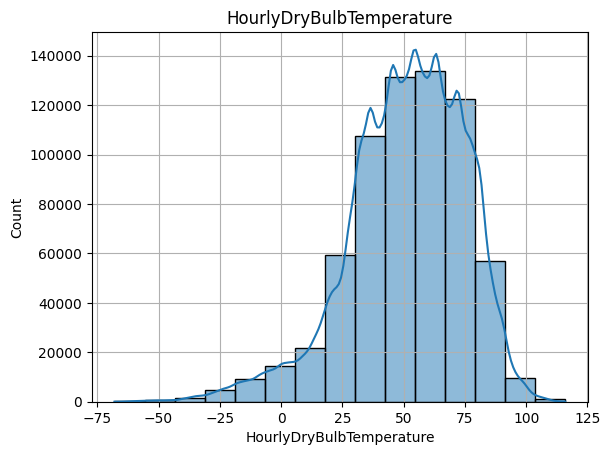

In [ ]:
df = df.dropna(subset=['HourlyDryBulbTemperature'])
df['HourlyDryBulbTemperature'] = df['HourlyDryBulbTemperature'].str.replace('s', '').replace('*', '0').astype(float, )
maxValue = df['HourlyDryBulbTemperature'].max()

df[['STATION', 'HourlyDryBulbTemperature']].groupby('STATION').mean().hist()
sns.histplot(df['HourlyDryBulbTemperature'], kde=True, bins=15 )